In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **categories**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
test_datagen = ImageDataGenerator( rescale=1./255,
                                  rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,
                                   # horizontal flip
                                   brightness_range=[0.2,0.8])

In [ ]:
test_set = test_datagen.flow_from_directory('gdrive/MyDrive/DermAI/Models/categories/testset/',
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 5154 images belonging to 5 classes.


In [ ]:
category =  keras.models.load_model('gdrive/MyDrive/DermAI/Models/categories/category.h5')

In [ ]:
prob = category.predict(test_set)
predIdxs = np.argmax(prob, axis=1)

162/162 [==============================] - 1847s 11s/step


AUC

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(test_set.labels, prob,   multi_class="ovr", average="macro")

0.9937190162504542

 Implementation confusion_matrix




In [ ]:
input_path = 'gdrive/MyDrive/DermAI/Models/categories/testset/'
test = image_dataset_from_directory(directory=input_path,
                                              batch_size=32,
                                              image_size=(224, 224))
key = test.class_names

Found 5154 files belonging to 5 classes.


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [ ]:
cm = confusion_matrix(test_set.labels, predIdxs)
cm_df = pd.DataFrame(cm,
                     index = key,
                     columns =key)

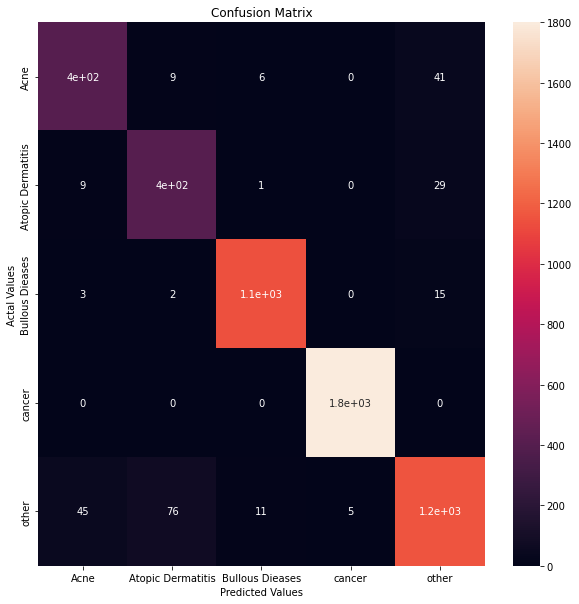

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

classification_report

In [ ]:
print(classification_report(test_set.labels, predIdxs,target_names = key, digits=5))

                   precision    recall  f1-score   support

             Acne    0.87636   0.87826   0.87731       460
Atopic Dermatitis    0.82172   0.91136   0.86422       440
  Bullous Dieases    0.98448   0.98279   0.98363      1162
           cancer    0.99723   1.00000   0.99861      1800
            other    0.93145   0.89396   0.91232      1292

         accuracy                        0.95111      5154
        macro avg    0.92225   0.93328   0.92722      5154
     weighted avg    0.95210   0.95111   0.95131      5154



## **Cancer Skin**

In [ ]:
input_path = 'gdrive/MyDrive/DermAI/Models/Cancer Skin/testset/'

In [ ]:
test_cancer = test_datagen.flow_from_directory(input_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 1800 images belonging to 9 classes.


In [ ]:
cancer_skin =  keras.models.load_model('gdrive/MyDrive/DermAI/Models/Cancer Skin/Cancer.h5')

In [ ]:
prob = cancer_skin.predict(test_cancer)
predIdxs = np.argmax(prob, axis=1)

57/57 [==============================] - 554s 10s/step


AUC

In [ ]:
metrics.roc_auc_score(test_cancer.labels, prob,   multi_class="ovr", average="macro")

0.9953319444444444

Confusion Matrix

In [ ]:
test = image_dataset_from_directory(directory=input_path,
                                              batch_size=32,
                                              image_size=(224, 224))
key = test.class_names

Found 1800 files belonging to 9 classes.


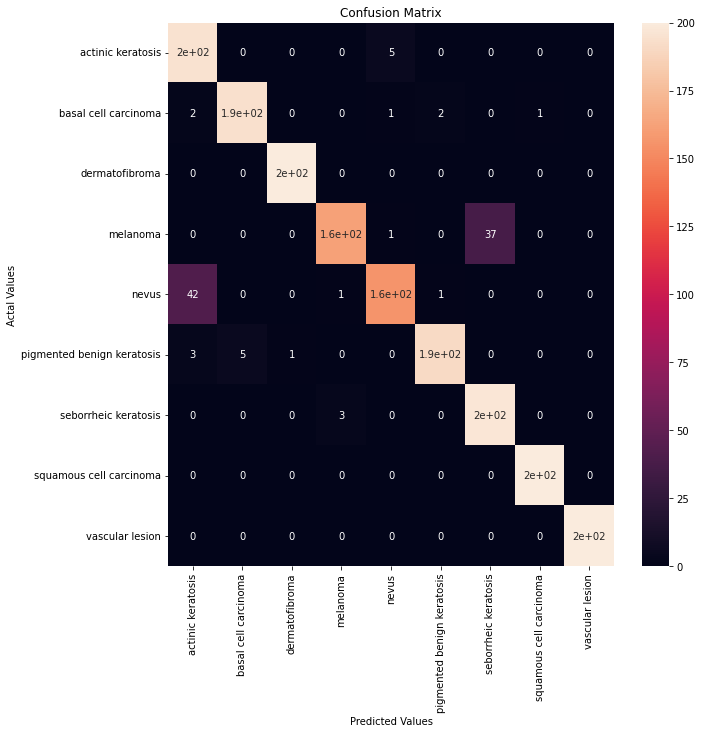

In [ ]:
cm = confusion_matrix(test_cancer.labels, predIdxs)
cm_df = pd.DataFrame(cm,
                     index = key,
                     columns =key)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

classification_report

In [ ]:
print(classification_report(test_cancer.labels, predIdxs,target_names = key, digits=5))

                            precision    recall  f1-score   support

         actinic keratosis    0.80579   0.97500   0.88235       200
      basal cell carcinoma    0.97487   0.97000   0.97243       200
            dermatofibroma    0.99502   1.00000   0.99751       200
                  melanoma    0.97590   0.81000   0.88525       200
                     nevus    0.95706   0.78000   0.85950       200
pigmented benign keratosis    0.98454   0.95500   0.96954       200
      seborrheic keratosis    0.84188   0.98500   0.90783       200
   squamous cell carcinoma    0.99502   1.00000   0.99751       200
           vascular lesion    1.00000   1.00000   1.00000       200

                  accuracy                        0.94167      1800
                 macro avg    0.94779   0.94167   0.94132      1800
              weighted avg    0.94779   0.94167   0.94132      1800



# **Bullous Diseases**

In [ ]:
input_path = 'gdrive/MyDrive/DermAI/Models/Bullous Diseases/testset/'

In [ ]:
test_bullous = test_datagen.flow_from_directory(input_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 501 images belonging to 7 classes.


In [ ]:
bullous =  keras.models.load_model('gdrive/MyDrive/DermAI/Models/Bullous Diseases/Bullous.h5')

In [ ]:
prob = bullous.predict(test_bullous)
predIdxs = np.argmax(prob, axis=1)

16/16 [==============================] - 148s 10s/step


AUC

In [ ]:
metrics.roc_auc_score(test_bullous.labels, prob,   multi_class="ovr", average="macro")

0.9890376443274621

Confusion Matrix

Found 501 files belonging to 7 classes.


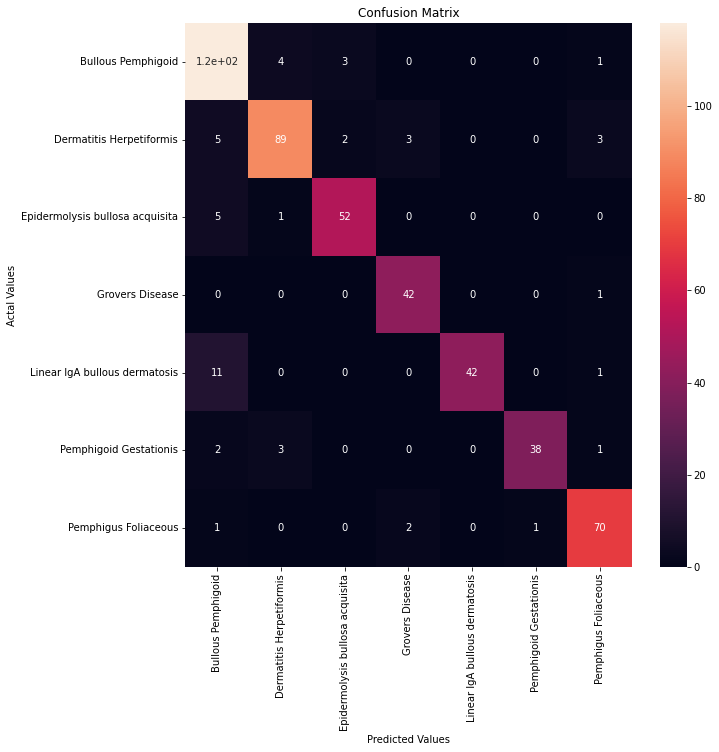

In [ ]:
test = image_dataset_from_directory(directory=input_path,
                                              batch_size=32,
                                              image_size=(224, 224))
key = test.class_names

cm = confusion_matrix(test_bullous.labels, predIdxs)
cm_df = pd.DataFrame(cm,
                     index = key,
                     columns =key)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

classification_report

In [ ]:
print(classification_report(test_bullous.labels, predIdxs,target_names = key, digits=5))

                                 precision    recall  f1-score   support

             Bullous Pemphigoid    0.83099   0.93651   0.88060       126
       Dermatitis Herpetiformis    0.91753   0.87255   0.89447       102
Epidermolysis bullosa acquisita    0.91228   0.89655   0.90435        58
                Grovers Disease    0.89362   0.97674   0.93333        43
  Linear IgA bullous dermatosis    1.00000   0.77778   0.87500        54
         Pemphigoid Gestationis    0.97436   0.86364   0.91566        44
           Pemphigus Foliaceous    0.90909   0.94595   0.92715        74

                       accuracy                        0.90020       501
                      macro avg    0.91969   0.89567   0.90437       501
                   weighted avg    0.90574   0.90020   0.90005       501



# **Atopic Dermatitis**

In [ ]:
input_path = 'gdrive/MyDrive/DermAI/Models/Atopic Dermatitis/testset/'
test_atopic = test_datagen.flow_from_directory(input_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 440 images belonging to 9 classes.


In [ ]:
Atopic_Dermatitis =  keras.models.load_model('gdrive/MyDrive/DermAI/Models/Atopic Dermatitis/Atopic Dermatitis.h5')

In [ ]:
prob = Atopic_Dermatitis.predict(test_atopic)
predIdxs = np.argmax(prob, axis=1)

14/14 [==============================] - 112s 8s/step


AUC

In [ ]:
metrics.roc_auc_score(test_atopic.labels, prob,   multi_class="ovr", average="macro")

0.9882083760873237

Confusion Matrix

Found 440 files belonging to 9 classes.


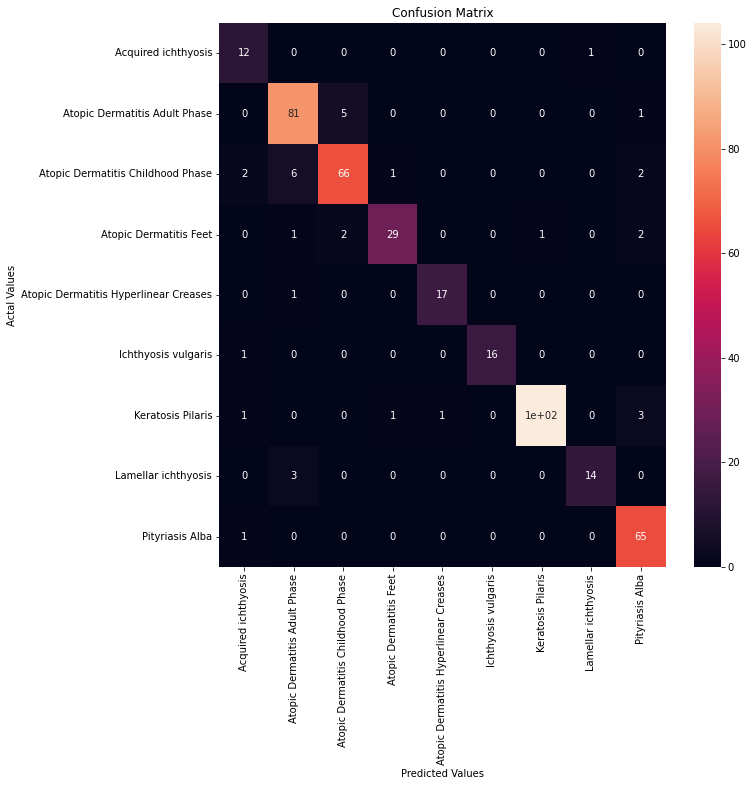

In [ ]:
test = image_dataset_from_directory(directory=input_path,
                                              batch_size=32,
                                              image_size=(224, 224))
key = test.class_names

cm = confusion_matrix(test_atopic.labels, predIdxs)
cm_df = pd.DataFrame(cm,
                     index = key,
                     columns =key)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

classification_report

In [ ]:
print(classification_report(test_atopic.labels, predIdxs,target_names = key, digits=5))

                                       precision    recall  f1-score   support

                  Acquired ichthyosis    0.70588   0.92308   0.80000        13
        Atopic Dermatitis Adult Phase    0.88043   0.93103   0.90503        87
    Atopic Dermatitis Childhood Phase    0.90411   0.85714   0.88000        77
               Atopic Dermatitis Feet    0.93548   0.82857   0.87879        35
Atopic Dermatitis Hyperlinear Creases    0.94444   0.94444   0.94444        18
                  Ichthyosis vulgaris    1.00000   0.94118   0.96970        17
                    Keratosis Pilaris    0.99048   0.94545   0.96744       110
                  Lamellar ichthyosis    0.93333   0.82353   0.87500        17
                      Pityriasis Alba    0.89041   0.98485   0.93525        66

                             accuracy                        0.91818       440
                            macro avg    0.90940   0.90881   0.90618       440
                         weighted avg    0.92209  

# **Acne & Roceasa**

In [ ]:
input_path = 'gdrive/MyDrive/DermAI/Models/Acne & Roceasa/testset/'
test_acne = test_datagen.flow_from_directory(input_path,
                                            target_size=(224,224),
                                            batch_size=32,
                                            shuffle=False)

Found 497 images belonging to 15 classes.


In [ ]:
Acne_Roceasa =  keras.models.load_model('gdrive/MyDrive/DermAI/Models/Acne & Roceasa/Acne.h5')

In [ ]:
prob = Acne_Roceasa.predict(test_acne)
predIdxs = np.argmax(prob, axis=1)

16/16 [==============================] - 173s 11s/step


AUC

In [ ]:
metrics.roc_auc_score(test_acne.labels, prob,   multi_class="ovr", average="macro")

0.9900467061451277

Confusion Matrix

Found 497 files belonging to 15 classes.


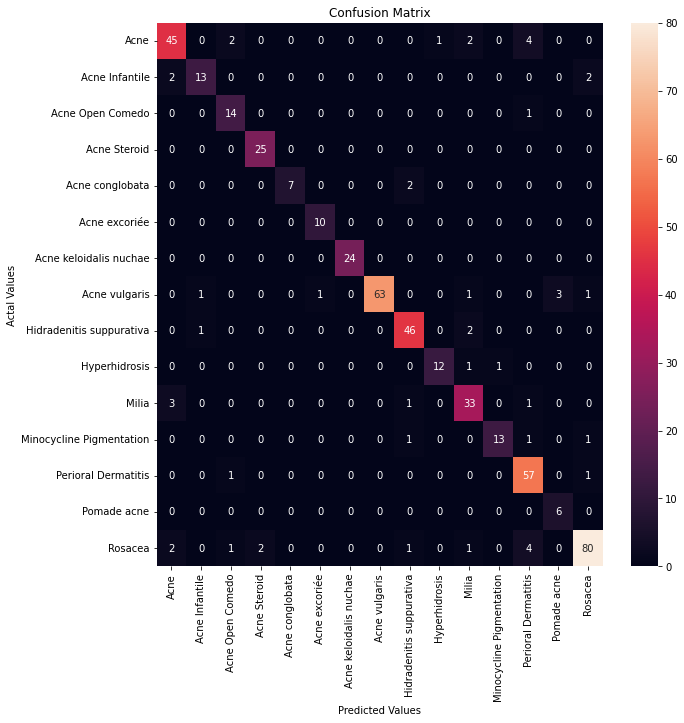

In [ ]:
test = image_dataset_from_directory(directory=input_path,
                                              batch_size=32,
                                              image_size=(224, 224))
key = test.class_names

cm = confusion_matrix(test_acne.labels, predIdxs)
cm_df = pd.DataFrame(cm,
                     index = key,
                     columns =key)
#Plotting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

classification_report

In [ ]:
print(classification_report(test_acne.labels, predIdxs,target_names = key, digits=5))

                          precision    recall  f1-score   support

                    Acne    0.86538   0.83333   0.84906        54
          Acne Infantile    0.86667   0.76471   0.81250        17
        Acne Open Comedo    0.77778   0.93333   0.84848        15
            Acne Steroid    0.92593   1.00000   0.96154        25
         Acne conglobata    1.00000   0.77778   0.87500         9
          Acne excoriée    0.90909   1.00000   0.95238        10
  Acne keloidalis nuchae    1.00000   1.00000   1.00000        24
           Acne vulgaris    1.00000   0.90000   0.94737        70
Hidradenitis suppurativa    0.90196   0.93878   0.92000        49
           Hyperhidrosis    0.92308   0.85714   0.88889        14
                   Milia    0.82500   0.86842   0.84615        38
Minocycline Pigmentation    0.92857   0.81250   0.86667        16
     Perioral Dermatitis    0.83824   0.96610   0.89764        59
             Pomade acne    0.66667   1.00000   0.80000         6
         